<a href="https://colab.research.google.com/github/mahyarhabibi/GenderGaps_Hollywood/blob/main/Codes/results_appendix_pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook generates the results and table displayed in Appendix B.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

# Directories to read data and store results
#Please add the parent folder to your Google Drive
# Public Link: https://drive.google.com/drive/folders/1TYCDAJOCiLZw4TObcLac5GnL5YtwYnUD?usp=sharing
parent_dir = "/content/gdrive/MyDrive/GenderGaps_Hollywood/" # You may need to change the address
data_dir = os.path.join(parent_dir, 'Data/')
results_dir = os.path.join(parent_dir,'Results/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
with open(results_dir + 'critics_reg_results.json', 'r') as input_file:
  critics_reg_results = json.load(input_file)

with open(results_dir + 'users_reg_results.json', 'r') as input_file:
  users_reg_results = json.load(input_file)


In [7]:
def regplot(ax, coefs, lower_bar, upper_bar,N=0,R2=0.0, ind_fe = 'No'):
  labels=[f'{yr}' for yr in range(1990,2022)]
  ax.plot(labels, coefs, 'b-', label='mean_1')
  ax.fill_between(labels, lower_bar, upper_bar, color='g', alpha=0.2)
  ax.tick_params(axis='x', rotation=90)
  ax.axhline(color = 'k')
  ax.axvline(x=27, color='r')
  textstr = '\n'.join(( f'$R^2$ = {R2}', f'N = {N:,}', f'Author FE: {ind_fe}'))

  ax.text(0.70, 0.25, textstr, transform=ax.transAxes, fontsize=13,
        verticalalignment='top')

In [8]:
# Yearly Discrimination Estimates 2010-2021:
coefs_yr_base = critics_reg_results['Base']['coefs'][-32:]
conf_ints_base = critics_reg_results['Base']['conf_intervals'][-32:]
lowbar_base = [interv[0] for interv in conf_ints_base]
upbar_base = [interv[1] for interv in conf_ints_base]
r2_base = critics_reg_results['Base']['R_squared']
nobs_base = critics_reg_results['Base']['N_Obs']

# Active Critics
coefs_yr_cfe = critics_reg_results['active_critics']['coefs'][-32:]
conf_ints_cfe = critics_reg_results['active_critics']['conf_intervals'][-32:]
lowbar_cfe = [interv[0] for interv in conf_ints_cfe]
upbar_cfe = [interv[1] for interv in conf_ints_cfe]
r2_cfe = critics_reg_results['active_critics']['R_squared']
nobs_cfe = critics_reg_results['active_critics']['N_Obs']

# Female Critics Only
coefs_yr_fem = critics_reg_results['Female_critics']['coefs'][-32:]
conf_ints_fem = critics_reg_results['Female_critics']['conf_intervals'][-32:]
lowbar_fem = [interv[0] for interv in conf_ints_fem]
upbar_fem = [interv[1] for interv in conf_ints_fem]
r2_fem = critics_reg_results['Female_critics']['R_squared']
nobs_fem = critics_reg_results['Female_critics']['N_Obs']

# Male Critics Only
coefs_yr_mal = critics_reg_results['Male_critics']['coefs'][-32:]
conf_ints_mal = critics_reg_results['Male_critics']['conf_intervals'][-32:]
lowbar_mal = [interv[0] for interv in conf_ints_mal]
upbar_mal = [interv[1] for interv in conf_ints_mal]
r2_mal = critics_reg_results['Male_critics']['R_squared']
nobs_mal = critics_reg_results['Male_critics']['N_Obs']

# Users:
# Yearly Discrimination Estimates 2010-2021:
user_coefs_yr_base = users_reg_results['all_users']['coefs'][-32:]
user_conf_ints_base = users_reg_results['all_users']['conf_intervals'][-32:]
user_lowbar_base = [interv[0] for interv in user_conf_ints_base]
user_upbar_base = [interv[1] for interv in user_conf_ints_base]
user_r2_base = users_reg_results['all_users']['R_squared']
user_nobs_base = users_reg_results['all_users']['N_Obs']

# Users
user_coefs_yr_ufe = users_reg_results['active_users']['coefs'][-32:]
user_conf_ints_ufe = users_reg_results['active_users']['conf_intervals'][-32:]
user_lowbar_ufe = [interv[0] for interv in user_conf_ints_ufe]
user_upbar_ufe = [interv[1] for interv in user_conf_ints_ufe]
user_r2_ufe = users_reg_results['active_users']['R_squared']
user_nobs_ufe = users_reg_results['active_users']['N_Obs']

In [9]:
# Yearly Estimates Baseline: 

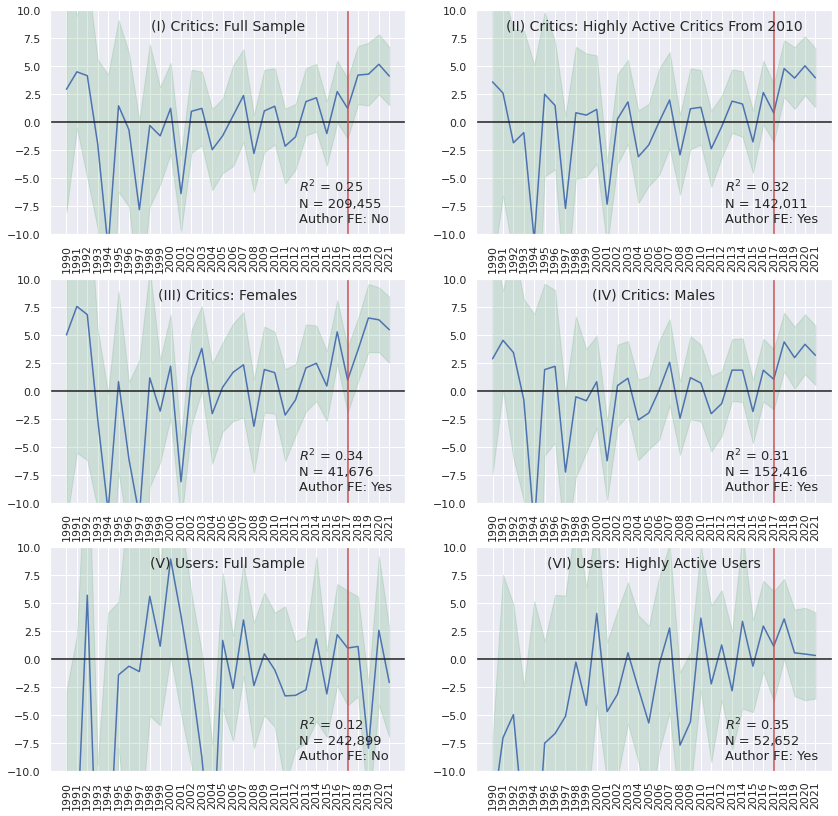

In [10]:
sns.set()
fig, axes = plt.subplots(3,2 ,figsize=(14,14))
regplot(axes[0,0], coefs_yr_base,lowbar_base,upbar_base ,int(nobs_base),
        round(r2_base,2))

regplot(axes[0,1], coefs_yr_cfe, lowbar_cfe, upbar_cfe,  int(nobs_cfe), 
        round(r2_cfe,2), 'Yes')

regplot(axes[1,0], coefs_yr_fem,lowbar_fem,upbar_fem ,int(nobs_fem),
        round(r2_fem,2), 'Yes' )

regplot(axes[1,1], coefs_yr_mal, lowbar_mal, upbar_mal,  int(nobs_mal), 
        round(r2_mal,2), 'Yes')

regplot(axes[2,0], user_coefs_yr_base, user_lowbar_base, user_upbar_base ,
        int(user_nobs_base), round(user_r2_base,2) )

regplot(axes[2,1], user_coefs_yr_ufe, user_lowbar_ufe, user_upbar_ufe,  
        int(user_nobs_ufe), round(user_r2_ufe,2), 'Yes')

# fig.suptitle("Discrimination By The Director's Gender: Critic Reviews", fontsize=20, y=0.92)
axes[0,0].set_title("(I) Critics: Full Sample", fontsize=14, y=1.0, pad=-20)
axes[0,1].set_title("(II) Critics: Highly Active Critics From 2010", fontsize=14, y=1.0, pad=-20)
axes[1,0].set_title("(III) Critics: Females", fontsize=14, y=1.0, pad=-20)
axes[1,1].set_title("(IV) Critics: Males", fontsize=14, y=1.0, pad=-20)
axes[2,0].set_title("(V) Users: Full Sample", fontsize=14, y=1.0, pad=-20)
axes[2,1].set_title("(VI) Users: Highly Active Users", fontsize=14 , y=1.0, pad=-20)

for ax in fig.get_axes():
  ax.set_ylim(-10,10)

axes[2,0].set_ylim(-10,10)
axes[2,1].set_ylim(-10,10)


fig.savefig(results_dir + 'regressions_appendix.jpg', dpi=300,bbox_inches='tight')

In [11]:
# Director + Actors
# Female Director x Year
coefs_yr_D = critics_reg_results['DFem+AFem']['DFem_Year']['coefs'][-12:]
conf_ints_D = critics_reg_results['DFem+AFem']['DFem_Year']['conf_intervals'][-12:]
lowbar_D = [interv[0] for interv in conf_ints_D]
upbar_D = [interv[1] for interv in conf_ints_D]
r2_D = critics_reg_results['DFem+AFem']['DFem_Year']['R_squared']
nobs_D = critics_reg_results['DFem+AFem']['DFem_Year']['N_Obs']

# Female Actor#1 x Year
coefs_yr_A1 = critics_reg_results['DFem+AFem']['A1Fem_Year']['coefs'][-12:]
conf_ints_A1 = critics_reg_results['DFem+AFem']['A1Fem_Year']['conf_intervals'][-12:]
lowbar_A1 = [interv[0] for interv in conf_ints_A1]
upbar_A1 = [interv[1] for interv in conf_ints_A1]
r2_A1 = critics_reg_results['DFem+AFem']['A1Fem_Year']['R_squared']
nobs_A1 = critics_reg_results['DFem+AFem']['A1Fem_Year']['N_Obs']

# Female Actor#2 x Year
coefs_yr_A2 = critics_reg_results['DFem+AFem']['A2Fem_Year']['coefs'][-12:]
conf_ints_A2 = critics_reg_results['DFem+AFem']['A2Fem_Year']['conf_intervals'][-12:]
lowbar_A2 = [interv[0] for interv in conf_ints_A2]
upbar_A2 = [interv[1] for interv in conf_ints_A2]
r2_A2 = critics_reg_results['DFem+AFem']['A2Fem_Year']['R_squared']
nobs_A2 = critics_reg_results['DFem+AFem']['A2Fem_Year']['N_Obs']

# Female Actor#3 x Year
coefs_yr_A3 = critics_reg_results['DFem+AFem']['A3Fem_Year']['coefs'][-12:]
conf_ints_A3 = critics_reg_results['DFem+AFem']['A3Fem_Year']['conf_intervals'][-12:]
lowbar_A3 = [interv[0] for interv in conf_ints_A3]
upbar_A3 = [interv[1] for interv in conf_ints_A3]
r2_A3 = critics_reg_results['DFem+AFem']['A3Fem_Year']['R_squared']
nobs_A3 = critics_reg_results['DFem+AFem']['A3Fem_Year']['N_Obs']

In [12]:
# Range: 2010-2021
def regplot2(ax, coefs, lower_bar, upper_bar,N=0,R2=0.0, ind_fe = 'No'):
  labels=[f'{yr}' for yr in range(2010,2022)]
  ax.plot(labels, coefs, 'b-', label='mean_1')
  ax.fill_between(labels, lower_bar, upper_bar, color='g', alpha=0.2)
  ax.tick_params(axis='x', rotation=90)
  ax.axhline(color = 'k')
  ax.axvline(x=7, color='r')
  textstr = '\n'.join(( f'$R^2$ = {R2}', f'N = {N:,}', f'Author FE: {ind_fe}'))

  ax.text(0.70, 0.25, textstr, transform=ax.transAxes, fontsize=13,
        verticalalignment='top')

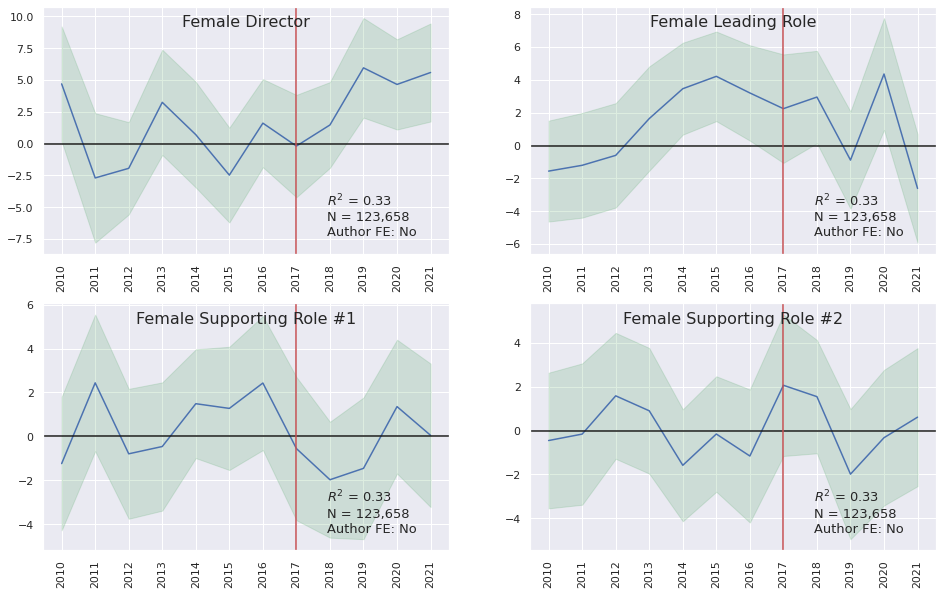

In [13]:
sns.set()
fig, axes = plt.subplots(2,2 ,figsize=(16,10))
regplot2(axes[0,0], coefs_yr_D,lowbar_D,upbar_D ,int(nobs_D), round(r2_D,2) )
regplot2(axes[0,1], coefs_yr_A1, lowbar_A1, upbar_A1,  int(nobs_A1), round(r2_A1,2))
regplot2(axes[1,0], coefs_yr_A2,lowbar_A2,upbar_A2 ,int(nobs_A2), round(r2_A2,2) )
regplot2(axes[1,1], coefs_yr_A3, lowbar_A3, upbar_A3,  int(nobs_A3), round(r2_A3,2))

# fig.suptitle("Discrimination By The Director's Gender: Critic Reviews", fontsize=20, y=0.92)
axes[0,0].set_title("Female Director", fontsize=16, y=1.0, pad=-20)
axes[0,1].set_title("Female Leading Role", fontsize=16, y=1.0, pad=-20)
axes[1,0].set_title("Female Supporting Role #1", fontsize=16, y=1.0, pad=-20)
axes[1,1].set_title("Female Supporting Role #2", fontsize=16, y=1.0, pad=-20)

fig.savefig(results_dir + 'reg_actors_appendix.jpg', dpi=300,bbox_inches='tight')

In [14]:
# Spesific Subsamples
# Grading Outlets:
coefs_yr_grd = critics_reg_results['Grading Outlets']['coefs'][-12:]
conf_ints_grd = critics_reg_results['Grading Outlets']['conf_intervals'][-12:]
lowbar_grd = [interv[0] for interv in conf_ints_grd]
upbar_grd = [interv[1] for interv in conf_ints_grd]
r2_grd = critics_reg_results['Grading Outlets']['R_squared']
nobs_grd = critics_reg_results['Grading Outlets']['N_Obs']

# 10 Outlets with most reviews
coefs_yr_top10 = critics_reg_results['Top Outlets']['coefs'][-12:]
conf_ints_top10 = critics_reg_results['Top Outlets']['conf_intervals'][-12:]
lowbar_top10 = [interv[0] for interv in conf_ints_top10]
upbar_top10 = [interv[1] for interv in conf_ints_top10]
r2_top10 = critics_reg_results['Top Outlets']['R_squared']
nobs_top10 = critics_reg_results['Top Outlets']['N_Obs']

# N_User>30
coefs_yr_pop = critics_reg_results['N_user>30']['coefs'][-12:]
conf_ints_pop = critics_reg_results['N_user>30']['conf_intervals'][-12:]
lowbar_pop = [interv[0] for interv in conf_ints_pop]
upbar_pop = [interv[1] for interv in conf_ints_pop]
r2_pop = critics_reg_results['N_user>30']['R_squared']
nobs_pop = critics_reg_results['N_user>30']['N_Obs']

# Top Outlet and popular
coefs_yr_TP = critics_reg_results['All Top Outlets']['coefs'][-12:]
conf_ints_TP = critics_reg_results['All Top Outlets']['conf_intervals'][-12:]
lowbar_TP = [interv[0] for interv in conf_ints_TP]
upbar_TP = [interv[1] for interv in conf_ints_TP]
r2_TP = critics_reg_results['All Top Outlets']['R_squared']
nobs_TP = critics_reg_results['All Top Outlets']['N_Obs']

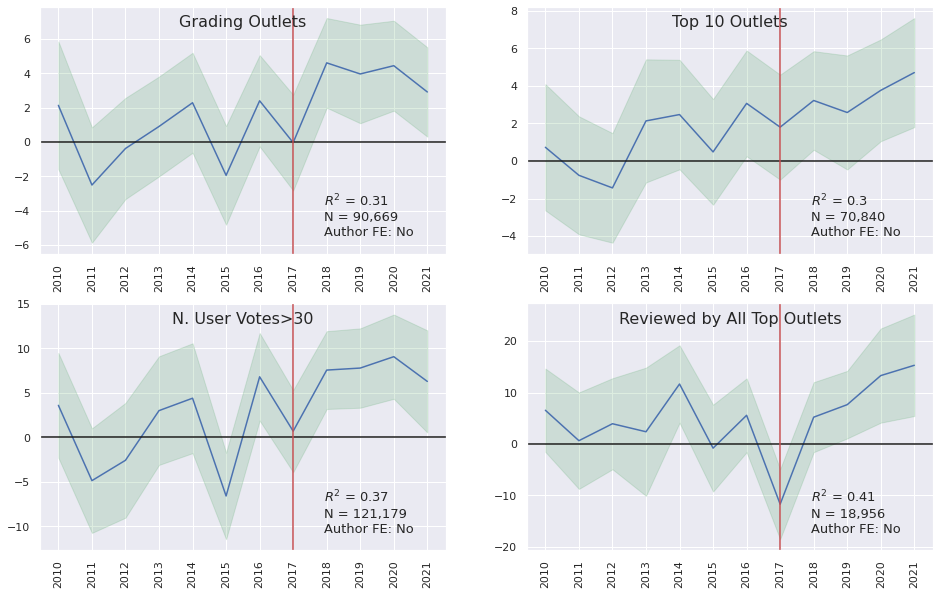

In [15]:
sns.set()
fig, axes = plt.subplots(2,2 ,figsize=(16,10))
regplot2(axes[0,0], coefs_yr_grd,lowbar_grd,upbar_grd ,int(nobs_grd), round(r2_grd,2) )
regplot2(axes[0,1], coefs_yr_top10, lowbar_top10, upbar_top10,  int(nobs_top10), round(r2_top10,2))
regplot2(axes[1,0], coefs_yr_pop,lowbar_pop,upbar_pop ,int(nobs_pop), round(r2_pop,2) )
regplot2(axes[1,1], coefs_yr_TP, lowbar_TP, upbar_TP,  int(nobs_TP), round(r2_TP,2))

# # fig.suptitle("Discrimination By The Director's Gender: Critic Reviews", fontsize=20, y=0.92)
axes[0,0].set_title("Grading Outlets", fontsize=16, y=1.0, pad=-20)
axes[0,1].set_title("Top 10 Outlets", fontsize=16, y=1.0, pad=-20)
axes[1,0].set_title("N. User Votes>30", fontsize=16, y=1.0, pad=-20)
axes[1,1].set_title("Reviewed by All Top Outlets", fontsize=16, y=1.0, pad=-20)

# for ax in fig.get_axes():
#   ax.set_ylim(-5,10)
fig.savefig(results_dir + 'reg_subsamples_appendix.jpg', dpi=300,bbox_inches='tight')